# EDA: Análisis Exploratorio de Datos

## Carga de librerías necesarias

In [1]:
# Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from scipy.stats import chi2
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

## Ingesta de los datos desde el repositorio

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/catalinatrevisan/tp-final-analitica/refs/heads/main/data/raw/online_gaming_behavior_dataset.csv")

## Análisis exploratorio inicial de los datos

In [3]:
# Forma del dataset
print(f"Dimensiones: {df.shape}")

# Primeras filas para obtener una vista general
print("\nPrimeras filas:")
display(df.head())

# Informacion general sobre tipos de datos y nulos
print("\nInformación del dataset:")
print(df.info())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
display(df.describe())

Dimensiones: (40034, 13)

Primeras filas:


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


El dataset tiene 40034 filas y 13 columnas.

Se observan tanto variables numéricas como categóricas.

Se identificó que la única columna con un tipo de dato erróneo es 'InGamePurchases'.

In [4]:
# Corrección tipo de dato
df['InGamePurchases'] = df['InGamePurchases'].astype(bool)

In [5]:
# Identificamos los diferentes tipos de columnas
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('PlayerID')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [6]:
# Análisis de valores nulos
missing_df = pd.DataFrame({
    'Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('% Nulos', ascending=False)

if missing_df['Nulos'].sum() == 0:
    print("No se encontraron valores nulos en el dataset")
else: print(missing_df[missing_df['Nulos'] > 0])


No se encontraron valores nulos en el dataset


No se detectan valores nulos en el dataset, por lo tanto no será necesario aplicar imputaciones.

In [7]:
# Análisis de duplicados
duplicados = df.duplicated().sum()
print(f"Filas duplicadas: {duplicados:,} ({duplicados/len(df)*100:.2f}%)")

if duplicados > 0:
    print("\nEjemplo de filas duplicadas:")
    display(df[df.duplicados(keep=False)].head(10))


Filas duplicadas: 0 (0.00%)


Se confirma que los registros son únicos.

In [8]:
# Análisis de valores únicos
unique_analysis = pd.DataFrame({
    'Valores Únicos': df.nunique(),
    '% Cardinalidad': (df.nunique() / len(df) * 100).round(2)
}).sort_values('% Cardinalidad', ascending=False)

display(unique_analysis)


,Valores Únicos,% Cardinalidad
PlayerID,40034,100.00
PlayTimeHours,40034,100.00
AvgSessionDurationMinutes,170,0.42
PlayerLevel,99,0.25
AchievementsUnlocked,50,0.12
Age,35,0.09
SessionsPerWeek,20,0.05
Location,4,0.01
GameGenre,5,0.01
EngagementLevel,3,0.01


Todas las variables tienen cardinalidad > 2 por lo que a primera vista resultan significativas

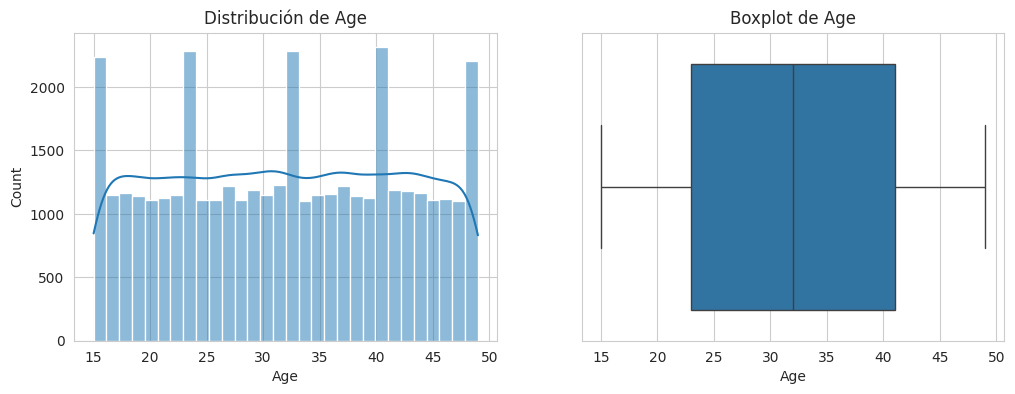

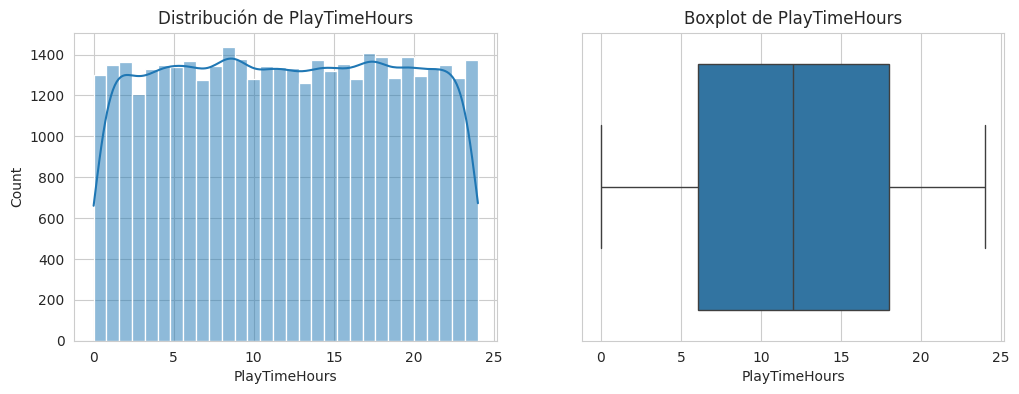

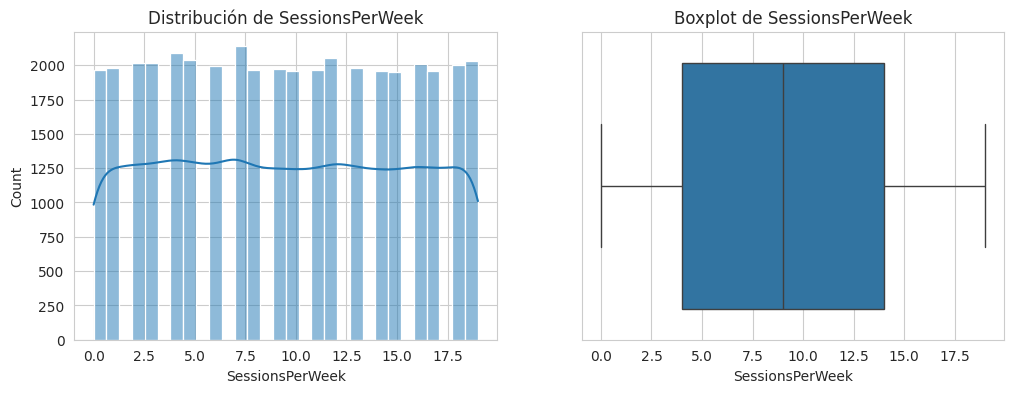

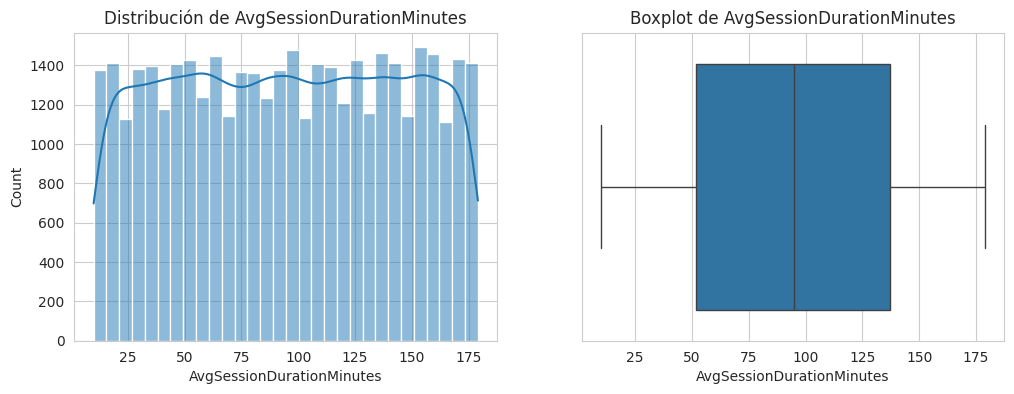

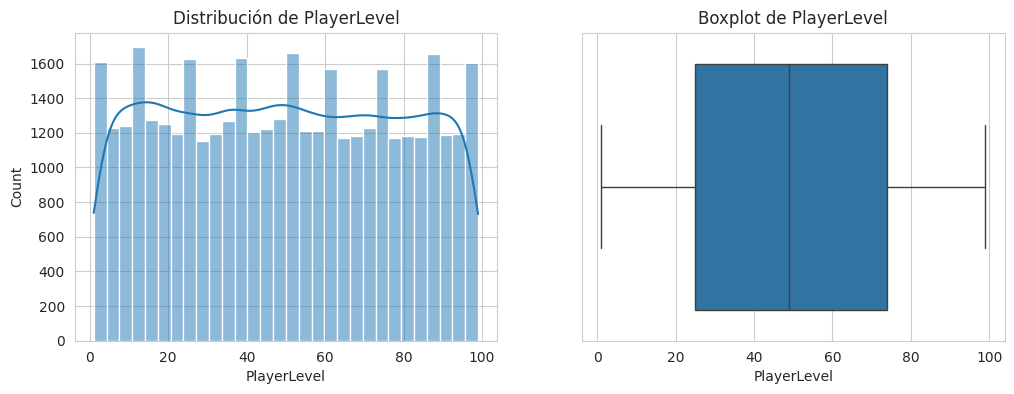

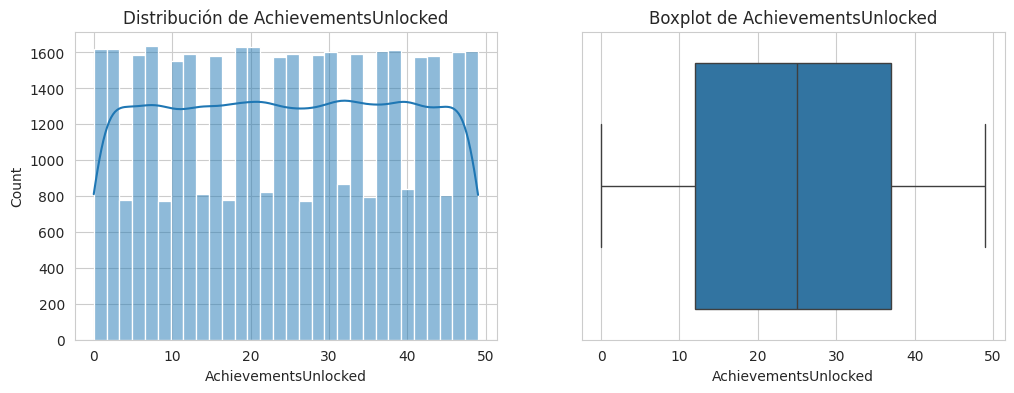

In [9]:
# Análisis de outliers

for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histograma + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

    plt.show()

El análisis gráfico no permite identificar presencia de outliers ya que no se muestran a simple vista largas colas en los histogramas o puntos extremos en los boxplots.

In [10]:
# Función auxiliar: análisis de outliers

def detect_outliers_multiple_methods(df, column):
    """
    Detecta outliers usando múltiples métodos
    """
    data = df[column].dropna()
    results = {}

    # Método 1: Z-Score
    z_scores = np.abs(stats.zscore(data))
    z_outliers_4 = data[z_scores > 4].index.tolist()
    results['Z-Score (>4)'] = len(z_outliers_4)

    # Método 2: IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
    results['IQR'] = len(iqr_outliers)

    return results, z_outliers_4  # Retornamos los outliers según el criterio del ejercicio

In [11]:
# Ánalisis de outliers

# Revisamos que el análisis gráfico sea correcto utilizando diferentes métodos

print("Variables con outliers y métodos de detección:")
outlier_summary = {}
outliers_by_variable = {}

for col in numeric_cols:
    if col in df.columns and df[col].notna().sum() > 0:
        methods_results, main_outliers = detect_outliers_multiple_methods(df, col)
        outlier_summary[col] = methods_results
        outliers_by_variable[col] = main_outliers

        print(f"\n{col}:")
        for method, count in methods_results.items():
            print(f"  - {method}: {count} outliers")

Variables con outliers y métodos de detección:

Age:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

PlayTimeHours:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

SessionsPerWeek:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

AvgSessionDurationMinutes:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

PlayerLevel:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

AchievementsUnlocked:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers


Confirmamos lo predicho a partir del análisis gráfico. No hay presencia de outliers


## Análisis exploratorio inicial con visualizaciones

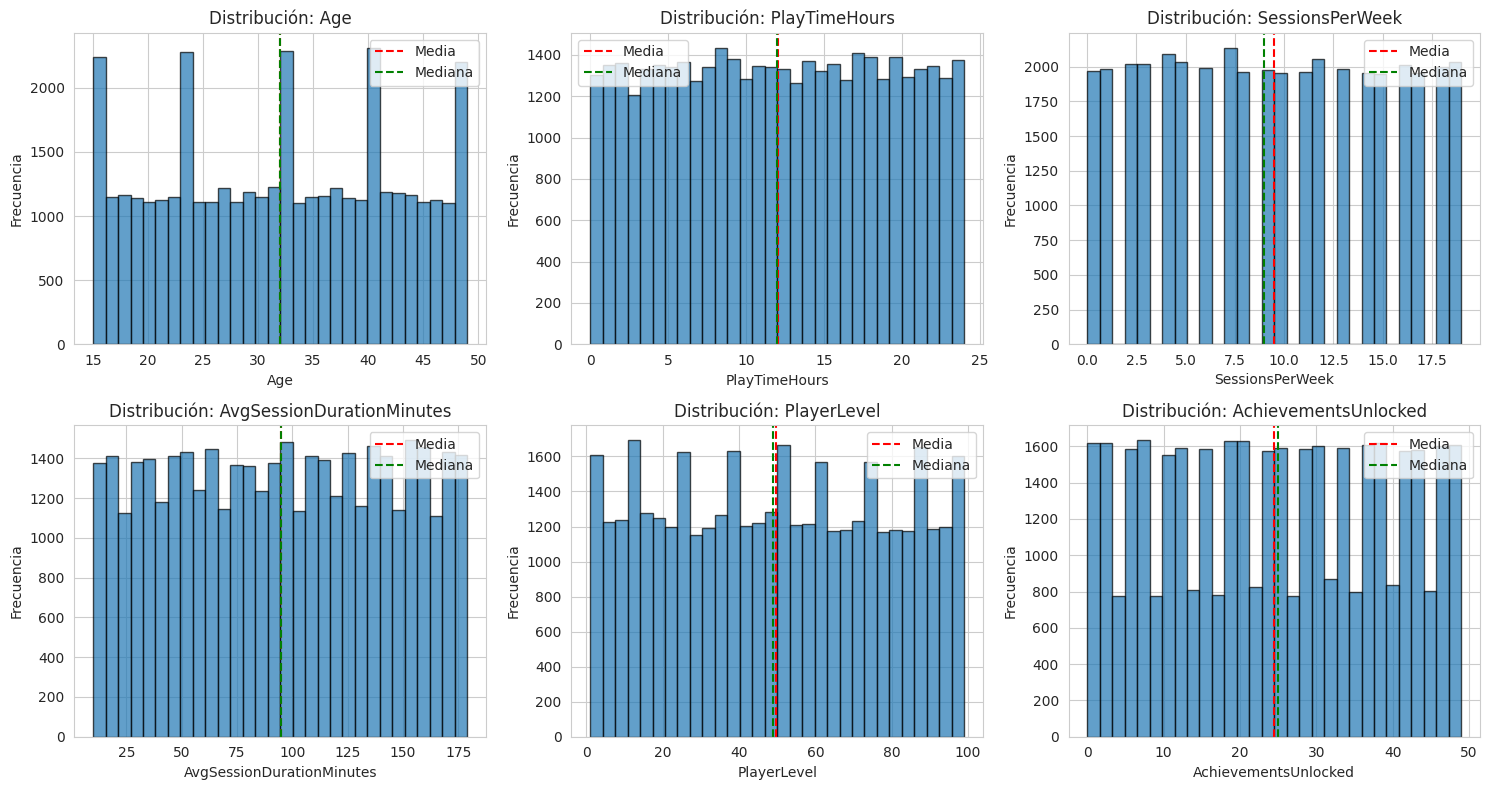

In [12]:
# Distribuciones de variables numéricas

fig, axes = plt.subplots(nrows=(len(numeric_cols)+2)//3, ncols=3, figsize=(15, 4*((len(numeric_cols)+2)//3)))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución: {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label='Media')
        axes[idx].axvline(df[col].median(), color='green', linestyle='--', label='Mediana')
        axes[idx].legend()

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

Algunas variables como Age, SessionsPerWeek o PlayerLevel presentan distribuciones con patrones poco naturales, con picos en valores específicos y una densidad sorprendentemente uniforme en el resto del rango. Esto sugiere que podría haber factores externos relacionados con la generación o el registro de los datos, más que variabilidad real en la población. Algunas posibles explicaciones son:

- Redondeo o discretización por parte de la fuente de datos, donde valores continuos podrían haber sido agrupados o ajustados automáticamente a números enteros o rangos comunes (por ejemplo, edades redondeadas a múltiplos de 5).

- Muestreo artificial o sintético, donde los datos podrían provenir de un proceso simulado o generado con reglas simplificadas, dando lugar a distribuciones uniformes o picos repetitivos.

- Sesgo en la forma de registro, como formularios que limitan las opciones a valores predefinidos o sistemas que autocompletan ciertos campos.

- Falta de variabilidad natural, típica de datasets diseñados para ejercicios académicos o benchmarks, donde la intención es controlar la estructura estadística.

- Dado que estos patrones no afectan directamente el objetivo del análisis y no representan valores extremos erróneos, no se considerarán outliers y se mantendrán en el dataset para el modelado.

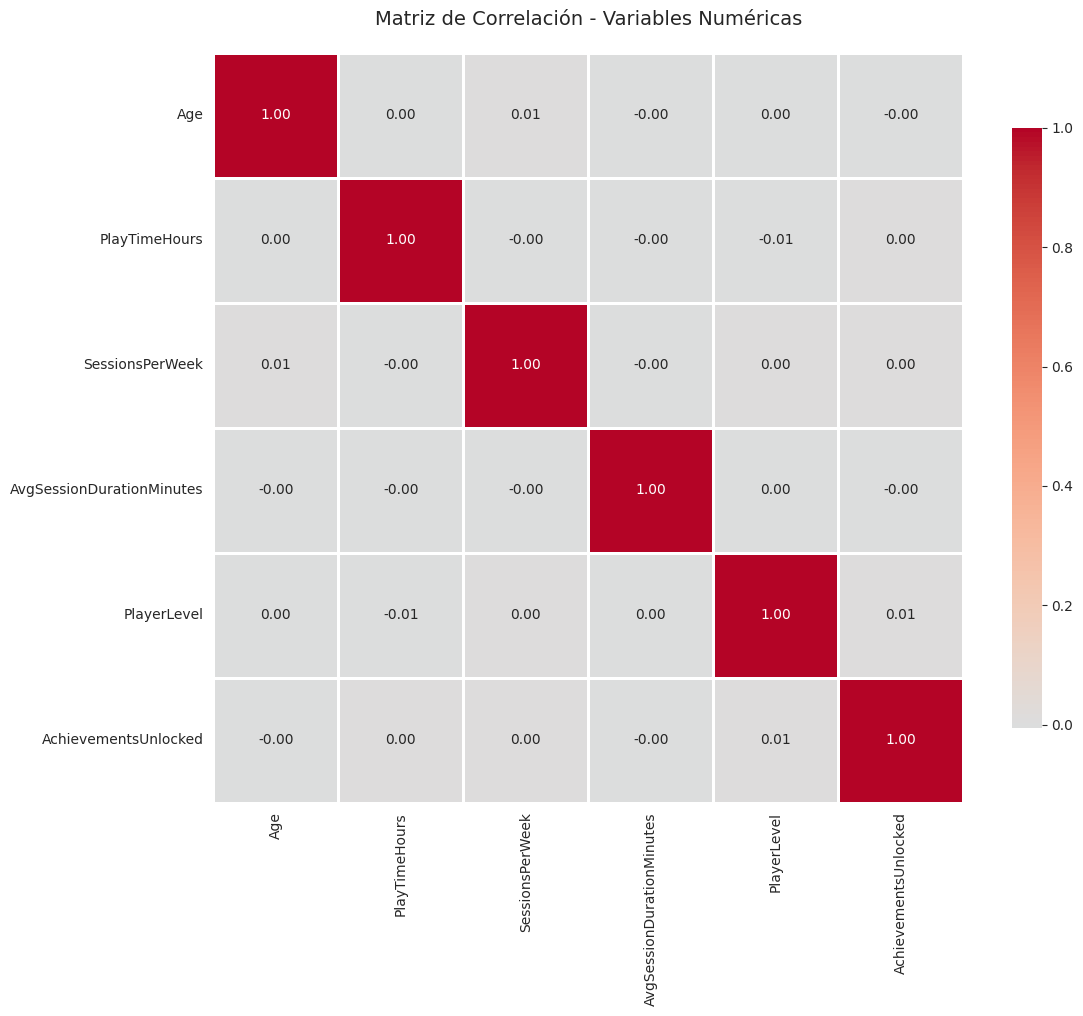


Correlaciones fuertes (|r| > 0.5):
No se encontraron correlaciones fuertes


In [13]:
# Matriz de correlación

if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    # Identificar correlaciones fuertes
    print("\nCorrelaciones fuertes (|r| > 0.5):")
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                high_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlación': correlation_matrix.iloc[i, j]
                })

    if high_corr:
        display(pd.DataFrame(high_corr))
    else:
        print("No se encontraron correlaciones fuertes")

- No se observan correlaciones significativas entre las variables numéricas (todas cercanas a 0).

- Esto sugiere independencia entre métricas de juego, edad y nivel del jugador.

- Al no haber relaciones lineales fuertes, no es necesario eliminar variables por multicolinealidad.

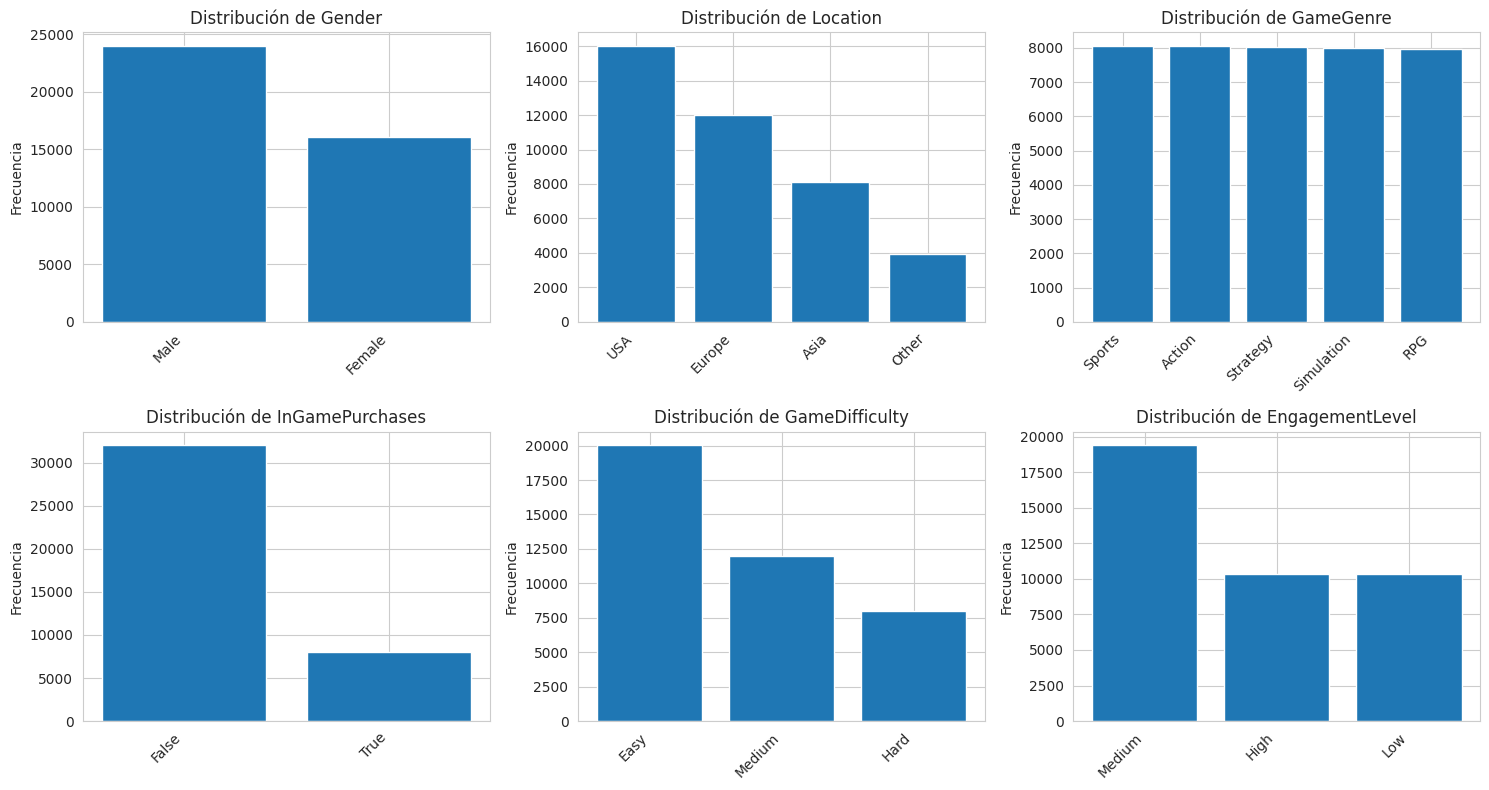

In [14]:
# Análisis de variables categóricas

nrows = (len(categorical_cols) + 2) // 3
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts().head(10)

    ax.bar(range(len(value_counts)), value_counts.values)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {col}')

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


- Predomina el género masculino (60%), con fuerte representación de jugadores de USA y Europa.
- La distribución por género de juego es bastante equilibrada, lo que aporta diversidad al dataset.
- En GameDifficulty se observa mayor frecuencia en 'Easy', indicando preferencia por niveles accesibles.
- EngagementLevel se concentra en 'Medium'
- Las compras dentro del juego (InGamePurchases) se presentan en una minoría (20%), lo que sugiere que la mayoría de los jugadores no gasta dinero adicional.


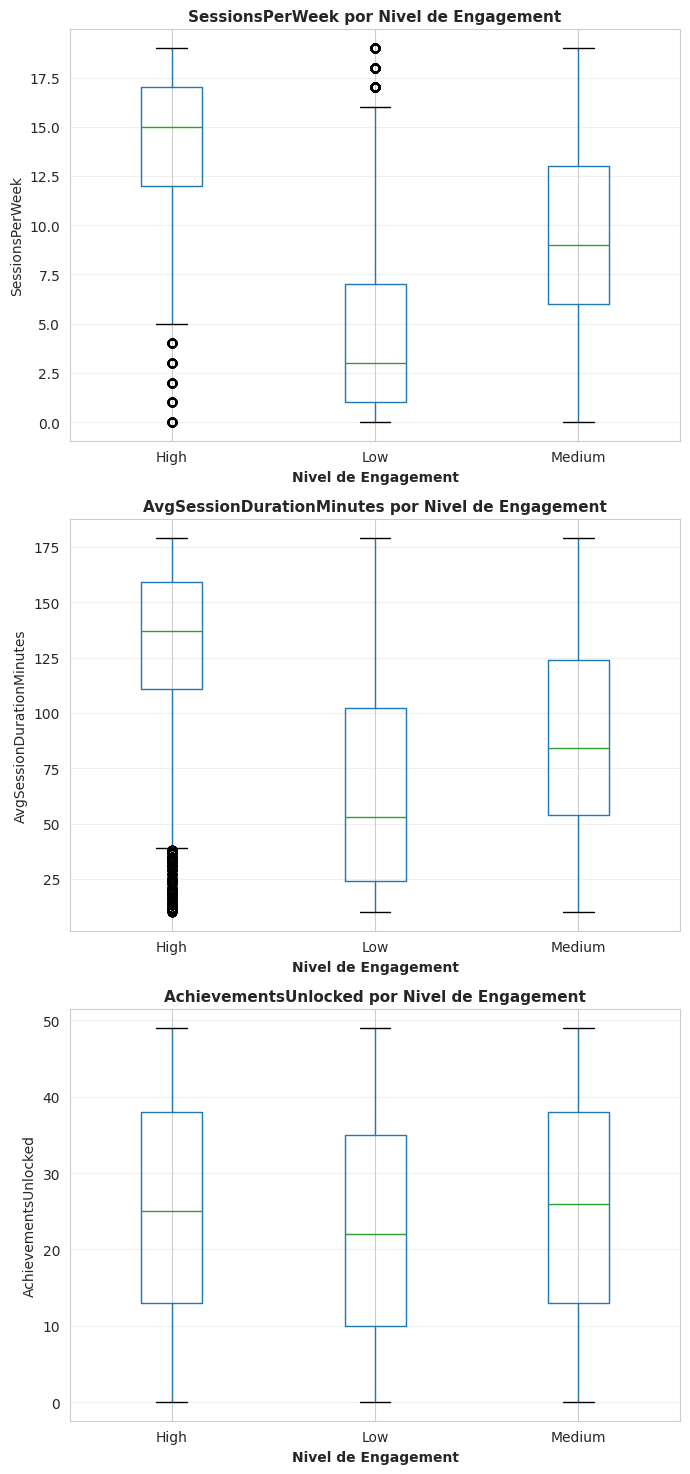



Estadísticas de Hábitos de Uso por Nivel de Engagement:

SessionsPerWeek:


,mean,median,std
Engagement_Categoria,,,
High,14.25,15.0,3.91
Low,4.53,3.0,4.86
Medium,9.55,9.0,4.76



AvgSessionDurationMinutes:


,mean,median,std
Engagement_Categoria,,,
High,131.92,137.0,34.07
Low,66.88,53.0,48.59
Medium,89.86,84.0,43.72



AchievementsUnlocked:


,mean,median,std
Engagement_Categoria,,,
High,25.10,25.0,14.42
Low,22.66,22.0,14.19
Medium,25.22,26.0,14.48


In [15]:
# Análisis de Hábitos por Niveles de Engagement

engagement_var = 'EngagementLevel'
frequency_var = 'SessionsPerWeek'
duration_var = 'AvgSessionDurationMinutes'
achievements_var = 'AchievementsUnlocked'

if engagement_var and engagement_var in df.columns:
    # Crear categorías de engagement
    df_temp = df.copy()

    if df_temp[engagement_var].dtype in ['int64', 'float64']:
        # Si es numérica, crear cuartiles
        df_temp['Engagement_Categoria'] = pd.qcut(df_temp[engagement_var], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'], duplicates='drop')
    else:
        # Si ya es categórica, usarla directamente
        df_temp['Engagement_Categoria'] = df_temp[engagement_var]

    # Comparar hábitos de uso entre niveles de engagement
    usage_vars_valid = [v for v in [frequency_var, duration_var, achievements_var] if v in df.columns and df[v].dtype in ['int64', 'float64']]

    if len(usage_vars_valid) > 0:
        fig, axes = plt.subplots(len(usage_vars_valid), 1, figsize=(7, 5*len(usage_vars_valid)))
        if len(usage_vars_valid) == 1:
            axes = [axes]  # Asegura que 'axes' sea iterable aunque haya un solo gráfico

        for idx, var in enumerate(usage_vars_valid):
            df_temp.boxplot(column=var, by='Engagement_Categoria', ax=axes[idx])
            axes[idx].set_title(f'{var} por Nivel de Engagement', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('Nivel de Engagement', fontsize=10, fontweight='bold')
            axes[idx].set_ylabel(var, fontsize=10)
            axes[idx].get_figure().suptitle('')  # Remueve el título automático que agrega pandas
            axes[idx].grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()


        # Estadísticas descriptivas por grupo
        print("\n\nEstadísticas de Hábitos de Uso por Nivel de Engagement:")
        for var in usage_vars_valid:
            print(f"\n{var}:")
            group_stats = df_temp.groupby('Engagement_Categoria')[var].agg(['mean', 'median', 'std']).round(2)
            display(group_stats)

Se observan claras diferencias entre los niveles de engagement:
1. Los jugadores con Engagement "High" presentan mayor cantidad de sesiones semanales y mayor duración promedio por sesión.
2. Los niveles "Low" muestran menor frecuencia y tiempo de juego, como era esperable.
3. En AchievementsUnlocked no hay diferencias tan marcadas, lo que podría indicar que el número de logros desbloqueados no depende tanto del engagement sino de la mecánica del juego.

Estas relaciones confirman la validez de las variables de engagement como indicadores de comportamiento de usuario dentro del entorno del juego.